In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('/Users/nick/Desktop/DataScience/ITC/final_project/Reviews.csv.zip')

### EDA

In [3]:
df.shape

(568454, 10)

In [4]:
df.head(5)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
len(duplicate_reviews)

58040

We have 58,040 duplicate reviews. Let's see if they have the same User Id.

In [7]:
reviews_with_same_userIds = df[df.duplicated(subset=['Text', 'ProductId', 'UserId'], keep=False)]
len(reviews_with_same_userIds)

2122

Out of the 58,040 duplicates, 2,122 have the same User Id. Let's remove the duplicates after the first from the dataset

In [8]:
df = df.drop_duplicates(subset=['Text', 'ProductId', 'UserId'], keep='first')
df.shape

(567145, 10)

Let's also review how many of the duplicate reviews are over 100 words :

In [9]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
duplicate_reviews = pd.Series(duplicate_reviews.index)
duplicates_with_over_100_words = duplicate_reviews.apply(lambda x: len(x.split()) > 100)
duplicates_with_over_100_words.sum()

14188

In [10]:
df[df.Text ==duplicate_reviews[0]]

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
10836    10837  B0034KP00S  A1TMAVN4CEM8U8      Gunner                     1   
11237    11238  B001KVPC0G  A1TMAVN4CEM8U8      Gunner                     0   
25447    25448  B0051TPWUI  A1TMAVN4CEM8U8      Gunner                     1   
43460    43461  B001EQ4P2I  A1TMAVN4CEM8U8      Gunner                     0   
43671    43672  B0049ZCF9G  A1TMAVN4CEM8U8      Gunner                     1   
51470    51471  B004HOLD92  A1TMAVN4CEM8U8      Gunner                     0   
51754    51755  B0034KN2KS  A1TMAVN4CEM8U8      Gunner                     0   
56016    56017  B004HONIMC  A1TMAVN4CEM8U8      Gunner                     0   
74233    74234  B00473PNGW  A1TMAVN4CEM8U8      Gunner                     0   
78118    78119  B004MC0CNW  A1TMAVN4CEM8U8      Gunner                     1   
81451    81452  B001EQ4RBM  A1TMAVN4CEM8U8      Gunner                     0   
96130    96131  B004HOLD4W  A1TMAVN4CEM8U8      Gunner                     0   
105289  105290  B001EQ4QJK  A1TMAVN4CEM8U8      Gunner                     0   
130312  130313  B001KVPBS4  A1TMAVN4CEM8U8      Gunner                     0   
134889  134890  B004HOQE64  A1TMAVN4CEM8U8      Gunner                     0   
158860  158861  B001TH4C2A  A1TMAVN4CEM8U8      Gunner                     1   
160271  160272  B002RSG8AE  A1TMAVN4CEM8U8      Gunner                     0   
195113  195114  B0049Z5OSK  A1TMAVN4CEM8U8      Gunner                     1   
220071  220072  B004HOSG0Q  A1TMAVN4CEM8U8      Gunner                     2   
220221  220222  B0051TPWG2  A1TMAVN4CEM8U8      Gunner                     3   
220900  220901  B000ZSZ5QQ  A1TMAVN4CEM8U8      Gunner                     1   
221927  221928  B0049Z9ANU  A1TMAVN4CEM8U8      Gunner                     1   
225030  225031  B001LNTY70  A1TMAVN4CEM8U8      Gunner                     0   
229922  229923  B000ZSX4GE  A1TMAVN4CEM8U8      Gunner                     1   
255430  255431  B003VDC3AI  A1TMAVN4CEM8U8      Gunner                     0   
307039  307040  B004HOOZEW  A1TMAVN4CEM8U8      Gunner                     0   
340295  340296  B006PGVJOO  A1TMAVN4CEM8U8      Gunner                     0   
347849  347850  B000ZT15EQ  A1TMAVN4CEM8U8      Gunner                     1   
351058  351059  B0034KN29O  A1TMAVN4CEM8U8      Gunner                     1   
352609  352610  B004HOQDK6  A1TMAVN4CEM8U8      Gunner                     0   
370159  370160  B000ZSZ5S4  A1TMAVN4CEM8U8      Gunner                     0   
439613  439614  B000ZSX4D2  A1TMAVN4CEM8U8      Gunner                     0   
446352  446353  B004051AUU  A1TMAVN4CEM8U8      Gunner                     0   
450160  450161  B004HOLDH4  A1TMAVN4CEM8U8      Gunner                     0   
450725  450726  B0043H148S  A1TMAVN4CEM8U8      Gunner                     0   
483041  483042  B002AWXELI  A1TMAVN4CEM8U8      Gunner                     0   
491214  491215  B008114GDW  A1TMAVN4CEM8U8      Gunner                     1   
513327  513328  B004HOLD60  A1TMAVN4CEM8U8      Gunner                     0   
558404  558405  B001KVPC8I  A1TMAVN4CEM8U8      Gunner                     0   
562161  562162  B004HOSGWE  A1TMAVN4CEM8U8      Gunner                     0   

        HelpfulnessDenominator  Score        Time  \
10836                        1      5  1331251200   
11237                        1      5  1332288000   
25447                        1      5  1331251200   
43460                        0      5  1336348800   
43671                        1      5  1331251200   
51470                        0      5  1336348800   
51754                        0      5  1336348800   
56016                        1      5  1332288000   
74233                        0      5  1336348800   
78118                        1      5  1331251200   
81451                        0      5  1336348800   
96130                        0      5  1336348800   
105289                       0      5  133

Out of the 58,002 remaning duplicates, 14,188 of the reviews have over 100 words.

In [11]:
df = df.loc[:,['ProductId','Text','Score']]

In [12]:
df.shape

(567145, 3)

In [13]:
df.isnull().sum()

ProductId    0
Text         0
Score        0
dtype: int64

We do not have missing values.

In [14]:
df.head(5)

ProductId                                               Text  Score
0  B001E4KFG0  I have bought several of the Vitality canned d...      5
1  B00813GRG4  Product arrived labeled as Jumbo Salted Peanut...      1
2  B000LQOCH0  This is a confection that has been around a fe...      4
3  B000UA0QIQ  If you are looking for the secret ingredient i...      2
4  B006K2ZZ7K  Great taffy at a great price.  There was a wid...      5

In [15]:
df.sort_values('ProductId')

ProductId                                               Text  Score
150513  0006641040  It's a great book with adorable illustrations....      5
150512  0006641040  I remembered this book from my childhood and g...      5
150514  0006641040  This book is a family favorite and was read to...      5
150515  0006641040  The same author wrote "Where the Wild Things A...      5
150516  0006641040  Classic children's book, can't go wrong. I rea...      5
...            ...                                                ...    ...
191720  B009UOFTUI  This coffee supposedly is premium, it tastes w...      1
1477    B009UOFU20  This coffee supposedly is premium, it tastes w...      1
328481  B009UUS05I  The basket was the perfect sympathy gift when ...      5
5702    B009WSNWC4  Purchased this product at a local store in NY ...      5
327600  B009WVB40S  I purchased this to send to my son who's away ...      5

[567145 rows x 3 columns]

In [16]:
index_unique_prod = np.where(df.ProductId.value_counts().values == 1)[0].shape[0]

In [17]:
index_unique_prod

30416

In [18]:
len(set(df.ProductId)) - index_unique_prod

43842

We have 43842 products that has at least 2 reviews on the dataset.

In [19]:
np.where(df.ProductId.value_counts().values > 5)[0].shape[0]

17304

We have 17310 products on our dataset with more than 5 reviews.

In [20]:
np.where(df.ProductId.value_counts().values > 10)[0].shape[0]

9617

We have 9617 products on our dataset with more than 10 reviews.

In [21]:
np.where(df.ProductId.value_counts().values > 100)[0].shape[0]

843

We have 843 products on our dataset with more than 100 reviews.

In [22]:
nbr_reviews = [np.where(df.ProductId.value_counts().values > k)[0].shape[0] for k in range(10,1000,20)]

In [23]:
nbr_reviews

[9617,
 3021,
 1799,
 1249,
 968,
 744,
 597,
 516,
 411,
 320,
 266,
 223,
 202,
 171,
 140,
 117,
 101,
 93,
 89,
 69,
 65,
 56,
 56,
 37,
 30,
 27,
 25,
 18,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

(0.0, 5000.0)

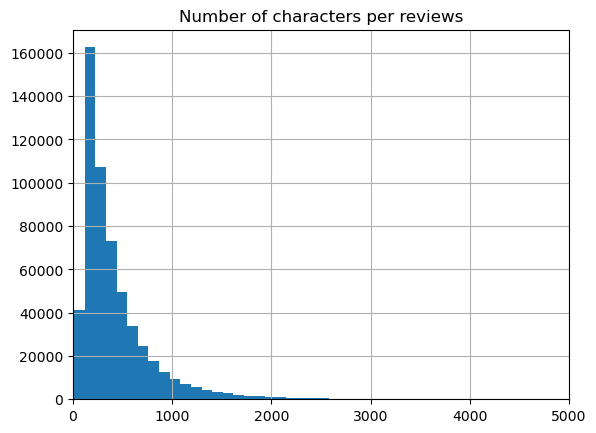

In [24]:
df.Text.str.len().hist(bins = 200)
plt.title('Number of characters per reviews')
plt.xlim(0,5000)

We can see that most of our reviews has less than 1000 characters. The majority of them has between 100 and 200 characters.

(0.0, 1000.0)

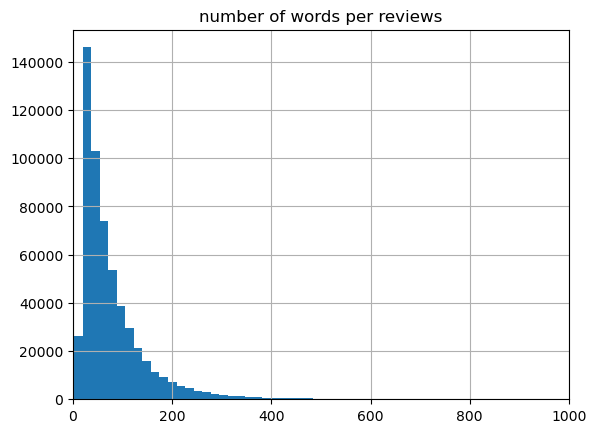

In [25]:
df.Text.str.split().map(lambda x : len(x)).hist(bins = 200)
plt.title('number of words per reviews')
plt.xlim(0,1000)

We can see that most of our reviews have less than 200 words. Most of them have around 40 words.

Text(0.5, 1.0, 'Average len of words per reviews')

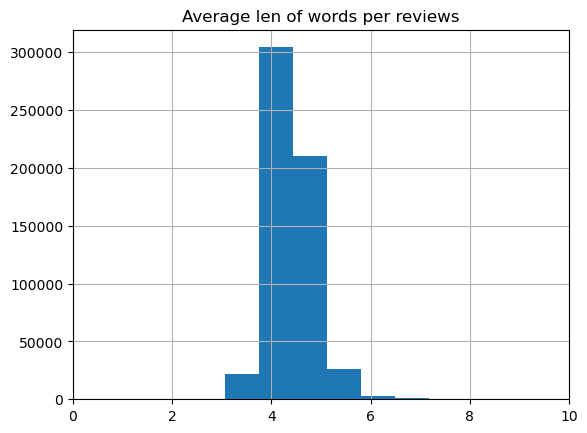

In [26]:
df.Text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist(bins = 50)
plt.xlim(0,10)
plt.title('Average len of words per reviews')

We see that most of the reviews have a length of words between 3 and 6. This can be explained by the 'stop words' which are reducing the mean.

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stop.remove('not')

In [29]:
from collections import defaultdict
new = df.Text.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i] # we get a list with all the words of all the reviews

dic = defaultdict(int)
for word in corpus:
  if word in stop:
    dic[word] +=1



<BarContainer object of 20 artists>

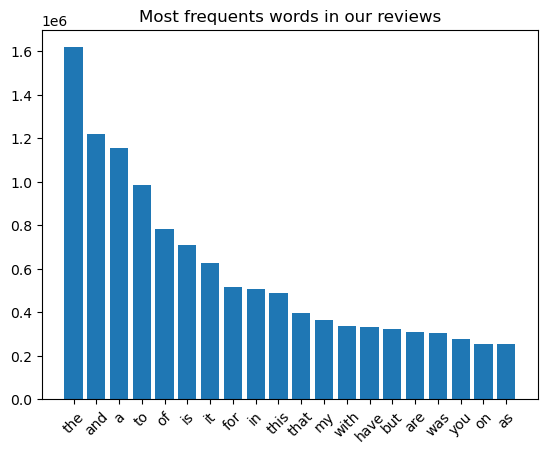

In [30]:
top = sorted(dic.items(), key = lambda x : x[1], reverse = True)[:20]
x,y = zip(*top)
plt.xticks(rotation = 45)
plt.title('Most frequents words in our reviews')
plt.bar(x,y)

We see how often are appearing stop words such as 'the','and',...

<Axes: >

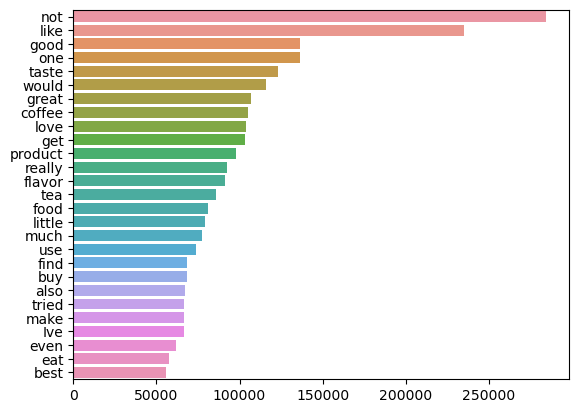

In [31]:
from collections import Counter
import re
counter = Counter(corpus)
most = counter.most_common()
x,y = [],[]
for word,count in most[:100]:
  if word.lower() not in stop :
    clean_word = re.sub(r'[^\w\s]', '', word) # remove punctuation
    if clean_word and len(clean_word) > 2:
      x.append(clean_word)
      y.append(count)

sns.barplot(x=y, y=x)



We see that we have a lot of positive words due to the fact that our dataset is imbalanced with a lot of good review with Words like 'good','great','love'.

In [32]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

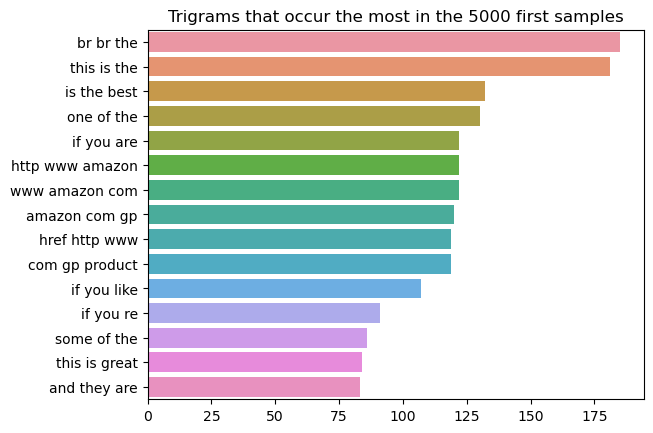

In [33]:
top_trigrams = get_top_ngram(df.Text.iloc[:5000], 3)
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y, y = x)
plt.title('Trigrams that occur the most in the 5000 first samples')
plt.show()

We see that we have a lot of reference to amazon and maybe the link of the product. We will see later why. We also have a lof of positive reviews patterns such as 'if you like', 'is the best', 'this is great'. We will have to do some data cleaning.

We split our data to train, validation and test using a groupshuffle to keep the same products on the same set.

In [34]:
from sklearn.model_selection import GroupShuffleSplit
splitter_temp = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 42)
split_temp = splitter_temp.split(df, groups=df['ProductId'])
train_inds, temp_inds = next(split_temp)

train = df.iloc[train_inds]
temp = df.iloc[temp_inds]



In [35]:
splitter_val = GroupShuffleSplit(test_size=.50, n_splits=1, random_state = 42)
split_val = splitter_val.split(temp, groups=temp['ProductId'])
val_inds, test_inds = next(split_val)

val = temp.iloc[val_inds]
test = temp.iloc[test_inds]

In [36]:
train.shape,val.shape,test.shape

((333029, 3), (115658, 3), (118458, 3))

In [37]:
X_train = train.drop(columns = 'Score')
y_train = train.Score

X_val = val.drop(columns = 'Score')
y_val = val.Score

X_test = test.drop(columns = 'Score')
y_test = test.Score

Name entity recognition :

In [38]:
# ! python3 -m spacy download en_core_web_sm

In [39]:
import spacy
spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.3 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [40]:
# import spacy
nlp = spacy.load('en_core_web_sm')

In [41]:
processed_reviews = []
for review in X_train.Text[:5]:
  doc = nlp(review)
  processed_reviews.append(doc)

In [42]:
for x in processed_reviews:
  print([(y.text,y.label_) for y in (x.ents)])

[('Vitality', 'ORG'), ('Labrador', 'PERSON')]
[('Jumbo', 'PERSON'), ('Jumbo', 'PERSON')]
[('Robitussin', 'GPE'), ('the Root Beer Extract', 'ORG')]
[]
[('five pound', 'QUANTITY'), ('only two weeks', 'DATE')]


In [43]:
from spacy import displacy
for process_review in processed_reviews:
  displacy.render(process_review,style = 'ent')
  print('\n')

/Users/nick/anaconda3/lib/python3.11/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [44]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents] # we just keep the labels

ent=X_train.Text[:100].apply(lambda x : ner(x)) # for each rows we get a list of labels
ent=[x for sub in ent for x in sub] # we get a single list with all the labels of all the rows

counter=Counter(ent)
count=counter.most_common()

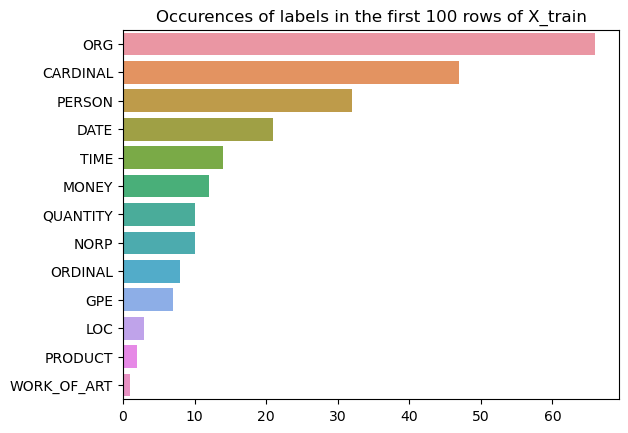

In [45]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
plt.title('Occurences of labels in the first 100 rows of X_train')
plt.show()

We see that on reviews, we have a lof of companies that are stated, probably corresponding to the company that is selling the product.

In [46]:
def ner_label(text,ent):
  doc = nlp(text)
  return [X.text for X in doc.ents if X.label_ == ent]



<Axes: title={'center': 'Companies that are stated in the first 1000 reviews of the train set'}>

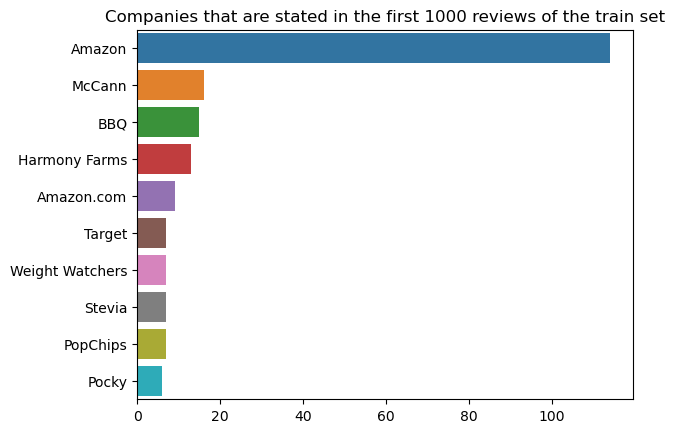

In [47]:
org = X_train.Text[:1000].apply(lambda x :ner_label(x,'ORG'))
org = [i for x in org for i in x]
counter = Counter(org)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('Companies that are stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

<Axes: title={'center': 'Cardinality that is stated in the first 1000 reviews of the train set'}>

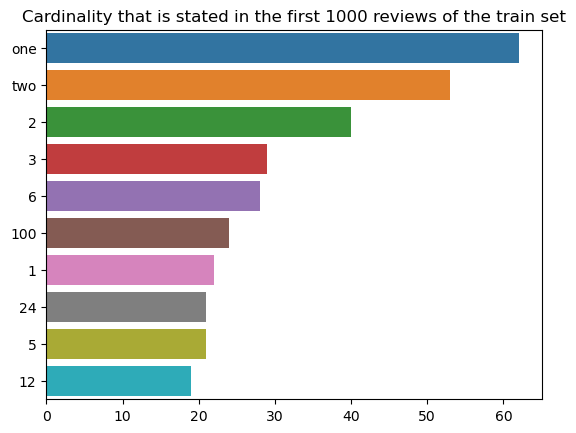

In [48]:
card = X_train.Text[:1000].apply(lambda x :ner_label(x,'CARDINAL'))
card = [i for x in card for i in x]
counter = Counter(card)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('Cardinality that is stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

<Axes: title={'center': 'People or brand that are stated in the first 1000 reviews of the train set'}>

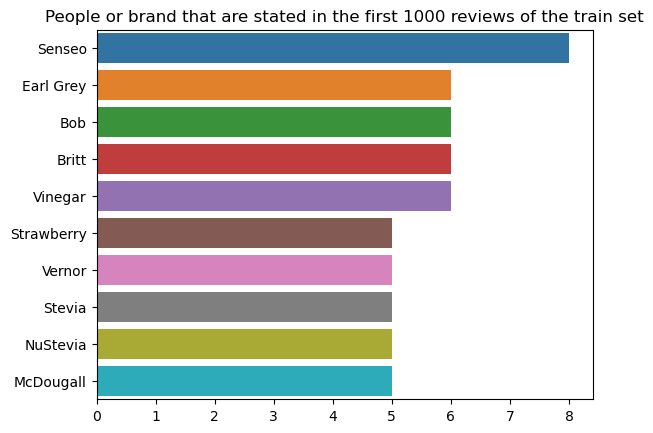

In [49]:
person = X_train.Text[:1000].apply(lambda x :ner_label(x,'PERSON'))
person = [i for x in person for i in x]
counter = Counter(person)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('People or brand that are stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

In [50]:
! pip install contractions

#### Preprocessing

In [51]:
stop.update(['come','got','however','think','box','still','want','always','eating','brand','though','put','sure','using','eat','bag','stuff',"try",'bought','mix','think','way','since','like','one','one','would','get','also','time','use','amazon','product','make','good','taste','find','tried','food','taste','flavor','could','found','used','made'])

In [52]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import contractions
import string
nltk.download('punkt')
nltk.download('wordnet')
our_stopwords = ['amazon','like','just','because','only','there','were','one','would','product','get','all','had','more','other','some','out','from','than','the','and','this','that','with','for','have','they','you','was','are','these','them','can','will','when','has','but']
def preprocess_news(df):
  ### function to clean each review
    corpus=[]
    lem=WordNetLemmatizer()
    for review in tqdm(df.Text, desc = 'preprocessing'):
      review = contractions.fix(review) # it removes all contractions (i'm -> i am)
      clean_words = []
      for w in word_tokenize(review): # each review is converted to a list of words. We do not have punctuations in the word (it is great, but -> 'it','is','great','but')
        if (w.lower() not in stop and len(w)> 2):
          no_punct = [char for char in w if char not in string.punctuation and not char.isdigit()]
          words_wo_punct = ''.join(no_punct).lower()
          if words_wo_punct and len(words_wo_punct) > 2 and words_wo_punct not in stop:
            words_wo_punct = lem.lemmatize(words_wo_punct)  # lemmatize : reduce each word into a common base (cats -> cat) based on the dictionary form
            clean_words.append(words_wo_punct)

      corpus.append(clean_words)

    return corpus

[nltk_data] Downloading package punkt to /Users/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
corpus = preprocess_news(X_train[:50000]) # we get a list of each words preprocessed of each reviews

preprocessing: 100%|█████████████████████| 50000/50000 [01:15<00:00, 659.62it/s]


In [54]:
from itertools import chain
all_words_cleaned = list(chain.from_iterable(corpus))

In [55]:
Counter(all_words_cleaned).most_common(20)

[('not', 58599),
 ('tea', 16058),
 ('great', 14363),
 ('love', 14001),
 ('coffee', 13129),
 ('dog', 10612),
 ('really', 8993),
 ('much', 8388),
 ('little', 7412),
 ('drink', 7248),
 ('price', 7076),
 ('buy', 6828),
 ('treat', 6722),
 ('even', 6573),
 ('best', 6537),
 ('well', 6444),
 ('better', 6239),
 ('store', 5821),
 ('chocolate', 5754),
 ('sugar', 5643)]

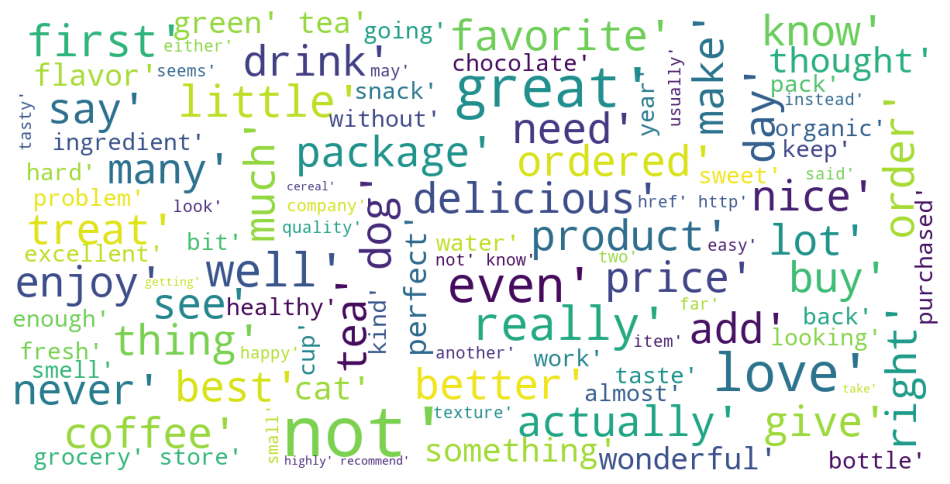

In [56]:
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data)) # generates the wordcloud based on text

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

#### Model

##### Unsupervised learning

In [57]:
import gensim
dic=gensim.corpora.Dictionary(corpus) # assign an id to each unique word of corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus] # we create a bag of words. We have a list of tuples for each row with (ID of the word, occurences of the word)

In [58]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 5,
                                   id2word = dic,
                                   passes = 5,
                                   workers = 2) # We use LDAMulticore as we have a large dataset ( it parallelizes the process)
# LDA models are used to get the main topics of our data.
# For each topic, we get the top words and the probability for this word to appear in the given topic
# based on all the possible words of this topic
lda_model.show_topics()

[(0,
  '0.032*"not" + 0.015*"chocolate" + 0.010*"great" + 0.009*"snack" + 0.007*"milk" + 0.007*"bar" + 0.006*"love" + 0.006*"oil" + 0.006*"rice" + 0.006*"nut"'),
 (1,
  '0.034*"not" + 0.027*"dog" + 0.017*"treat" + 0.014*"love" + 0.009*"cat" + 0.006*"great" + 0.006*"day" + 0.005*"give" + 0.005*"little" + 0.005*"year"'),
 (2,
  '0.045*"tea" + 0.031*"not" + 0.011*"price" + 0.010*"great" + 0.010*"store" + 0.008*"order" + 0.007*"green" + 0.007*"love" + 0.007*"buy" + 0.005*"shipping"'),
 (3,
  '0.044*"coffee" + 0.035*"not" + 0.012*"cup" + 0.010*"great" + 0.008*"love" + 0.006*"really" + 0.006*"noodle" + 0.006*"salt" + 0.006*"sauce" + 0.006*"strong"'),
 (4,
  '0.040*"not" + 0.027*"drink" + 0.014*"sugar" + 0.011*"water" + 0.009*"sweet" + 0.008*"energy" + 0.007*"ginger" + 0.007*"really" + 0.006*"fruit" + 0.006*"honey"')]

We get 5 main topics :
-  one seems to be about dog food
-  one seams to be about tea and drinks
-  one seems to be about food with chocolate
-  one seems to be about coffee with a chocolate flavor maybe
- one seems to be about snackfood such as chips

We see that many positive words are very frequent in the dataset such as 'delicious', 'love', 'good',...
we also have many words from fooding products such as 'flavor','taste','ingredients',...

In [59]:
perplexity = lda_model.log_perplexity(bow_corpus)
perplexity

-7.721978876981412

In [60]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

Coherence Score: 0.4397441833323665


##### supervised learning

In [61]:
y_corpus = y_train[:50000]

In [62]:
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression

rows, cols, data = [], [], []
for i, document in enumerate(bow_corpus):
    for word_index, word_count in document:
        rows.append(i)
        cols.append(word_index)
        data.append(word_count)

# Create a sparse matrix
num_docs = len(bow_corpus)
num_words = len(set(cols))
X_sparse = csr_matrix((data, (rows, cols)), shape=(num_docs, num_words))
# it creates a matrix where features are each words and each rows corresponds to a review


In [63]:
X_sparse.shape

(50000, 43333)

We have too many features. We need to proceed to feature selection. We remove features that have less than 100 non zeros values.

In [64]:
threshold = 100
non_zero_counts = X_sparse.getnnz(axis=0) # we get an array with the number of zeros per column
columns_to_keep = (non_zero_counts >= threshold).reshape(-1)
X_sparse_filtered = X_sparse[:, columns_to_keep]
X_sparse_filtered = csr_matrix(X_sparse_filtered)

In [65]:
X_sparse_filtered.shape

(50000, 2052)

###### logisticregression

In [66]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_sparse_filtered, y_corpus, test_size=0.2, random_state=42)

# Choose a model (e.g., Linear Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

class_report_lr = classification_report(y_test,y_pred)
print(class_report_lr)

              precision    recall  f1-score   support

           1       0.60      0.55      0.57       968
           2       0.29      0.21      0.24       569
           3       0.31      0.20      0.24       775
           4       0.39      0.20      0.26      1423
           5       0.78      0.92      0.84      6265

    accuracy                           0.69     10000
   macro avg       0.47      0.42      0.43     10000
weighted avg       0.64      0.69      0.65     10000



/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We get an accuracy of 0.69 for our baseline model.
Precisions and recalls of each labels are very poor except the label 5 as it is the predominant one of our dataset.

###### knn

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.31      0.26      0.29       968
           2       0.20      0.11      0.14       569
           3       0.20      0.10      0.13       775
           4       0.24      0.08      0.12      1423
           5       0.70      0.89      0.78      6265

    accuracy                           0.61     10000
   macro avg       0.33      0.29      0.29     10000
weighted avg       0.53      0.61      0.55     10000



We get very poor results : accuracy of 0.61 and precisions and recalls very low for the first four classes.

###### dummyclassifier

In [68]:
from sklearn.dummy import DummyClassifier
strat = ['most_frequent','prior','stratified','uniform']
for strategy in strat:
  dummy_clf = DummyClassifier(strategy = strategy)
  dummy_clf.fit(X_train,y_train)
  y_pred_dumm = dummy_clf.predict(X_test)
  print(f'Strategy = {strategy} : ')
  print(classification_report(y_test,y_pred_dumm))
  print('\n')

Strategy = most_frequent : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       968
           2       0.00      0.00      0.00       569
           3       0.00      0.00      0.00       775
           4       0.00      0.00      0.00      1423
           5       0.63      1.00      0.77      6265

    accuracy                           0.63     10000
   macro avg       0.13      0.20      0.15     10000
weighted avg       0.39      0.63      0.48     10000



Strategy = prior : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       968
           2       0.00      0.00      0.00       569
           3       0.00      0.00      0.00       775
           4       0.00      0.00      0.00      1423
           5       0.63      1.00      0.77      6265

    accuracy                           0.63     10000
   macro avg       0.13      0.20      0.15     10000
weighted avg       0.39    

/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nick/anaconda3/lib/pytho

- Strategy = 'most_frequent' : As we are predicting all our samples at the most frequent score, we get an accuracy of 0.63 but precision and recall of 0 for all first 4 classes.
- Strategy = 'prior' : As we are predicting all our samples at the most frequent score, we get an accuracy of 0.63 but precision and recall of 0 for all first 4 classes.
- Strategy = 'stratified' : As we are predicting samples based on the distribution of the target variable, we do not get 0s for precisions and recall. We get an accuracy of 0.42 lower than for the previous two strategies.
- Strategy = 'uniform' : As we predict each sample randomly we get almost the same precisions and recalls for each labels. However, as we have a majority of label 5 in our dataset, we get a very low accuracy of 0.2

In [69]:
models_results = {
    'LogisticRegression':list(classification_report(y_test,y_pred)),
    'KNN' : list(classification_report(y_test,y_pred_knn))
}
table_of_result = pd.DataFrame(models_results).transpose()
table_of_result

0   1   2   3   4   5   6   7   8   9    ... 478 479 480  \
LogisticRegression                                          ...               
KNN                                                         ...               

                   481 482 483 484 485 486 487  
LogisticRegression       1   0   0   0   0  \n  
KNN                      1   0   0   0   0  \n  

[2 rows x 488 columns]

### Lime Analysis

In [70]:
# Split train and test sets
X_train_lime = train[:50000].drop(columns = 'Score')
y_train_lime = train[:50000].Score

X_test_lime = test[:50000].drop(columns = 'Score')
y_test_lime = test[:50000].Score

In [71]:
# Initialize the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
vectorizer = TfidfVectorizer(min_df = 10, 
                              max_features = 100000, 
                              analyzer = "word", 
                              ngram_range = (1, 2), # (2, 2) for just biograms
                              stop_words = 'english', 
                              lowercase = True)

# Initialize a Logistic Regression model
model_lime = LogisticRegression(C = 0.5, solver = "sag")

# Create a pipeline object that combines the vectorization and logistic regression model steps
c = make_pipeline(vectorizer, model_lime)

In [72]:
# Import LimeTextExplainer
from lime.lime_text import LimeTextExplainer

###### Split reviews into negative and positive

In [73]:
# Define a function to map the scores to the new labeling scheme
def map_labels(score):
    if score in [1, 2, 3]:
        return 0 # negative
    elif score in [4, 5]:
        return 1 # positive

y_train_mapped = y_train_lime.apply(map_labels)
y_test_mapped = y_test_lime.apply(map_labels)

In [74]:
display("Proportion of values in target:")
display(y_train_mapped.value_counts(normalize=True, dropna=False))
print()

'Proportion of values in target:'

Score
1    0.77298
0    0.22702
Name: proportion, dtype: float64

In [75]:
# Fit the pipeline to the training data. This process includes transforming the raw text data into TF-IDF
c.fit(X_train_lime['Text'], y_train_mapped)
y_pred_lime = c.predict(X_test_lime['Text'])

In [76]:
# Create classification report
class_report = classification_report(y_test_mapped, y_pred_lime, target_names=['negative', 'positive'])

print(f"Classification Report:\n{class_report}\n")

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.50      0.63     11119
    positive       0.87      0.98      0.92     38881

    accuracy                           0.87     50000
   macro avg       0.86      0.74      0.77     50000
weighted avg       0.87      0.87      0.86     50000




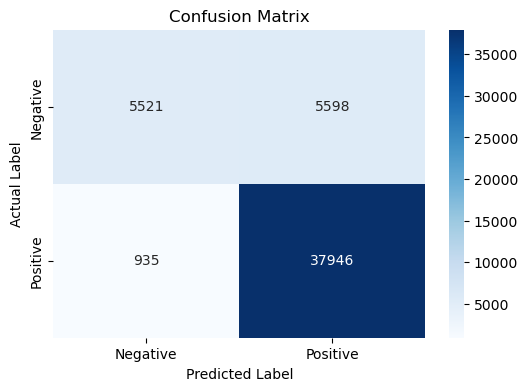

In [77]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_mapped, y_pred_lime)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

##### Feature importance

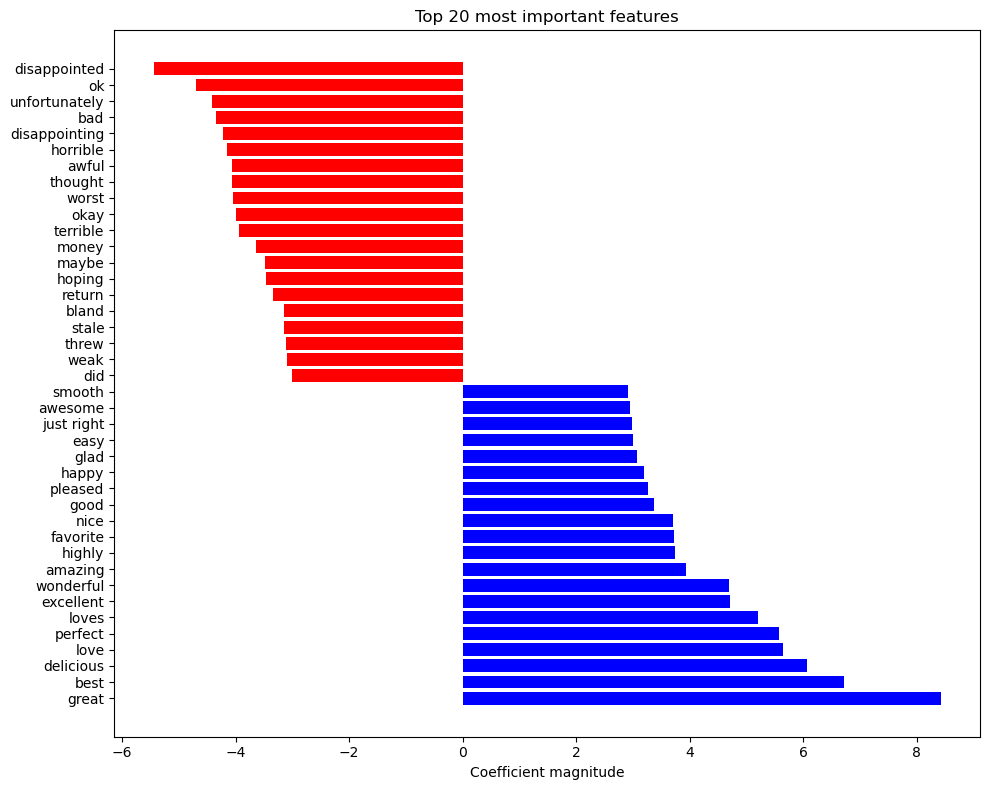

In [78]:
# Get the feature names from the vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the coefficients from the logistic regression model
coefs = model_lime.coef_[0]

# Sort the coefficients and corresponding feature names
sorted_indices = np.argsort(coefs)
sorted_coefs = coefs[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Visualize the most important features
top_n = 20  # Number of features to visualize
plt.figure(figsize=(10, 8))

# Select the top n important features for positive and negative classes
top_positive_coefficients = sorted_coefs[-top_n:]
top_positive_features = sorted_features[-top_n:]
top_negative_coefficients = sorted_coefs[:top_n]
top_negative_features = sorted_features[:top_n]

# Combine for plotting
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features = np.hstack([top_negative_features, top_positive_features])

# Assign colors based on the coefficient values
colors = ['red' if c < 0 else 'blue' for c in top_coefficients]

# Plot horizontal bar graph
plt.barh(np.arange(2 * top_n), top_coefficients, color=colors)
plt.yticks(np.arange(2 * top_n), top_features)
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.xlabel('Coefficient magnitude')
plt.title('Top 20 most important features')
plt.tight_layout()
plt.show()

The model picks up relevent features for both negative and positive reviews. 

**Top Negative**
- dissapointed
- ok & okay (from neutral?)
- unfortanately

**Top Positive**
- great
- best
- delicious

##### True Positive

In [79]:
# Initialize the LIME explainer for text data, specifying the class names for clearer explanations.
class_names = ['negative','positive']
explainer = LimeTextExplainer(class_names=class_names)

In [80]:
# Define actual and predicted
actual = np.array(y_test_mapped)
predicted = np.array(y_pred_lime)

# Find indices of true_positive and true negative
true_positives_indices = np.where((actual == 1) & (predicted == 1))[0]
true_negatives_indices = np.where((actual == 0) & (predicted == 0))[0]

# Analyze a true positive case with LIME
if true_positives_indices.size > 0:
    tp_index = true_positives_indices[0]  # Taking the first false positive instance
    tp_instance = X_test_lime.iloc[tp_index]['Text']
    tp_exp = explainer.explain_instance(tp_instance, c.predict_proba, num_features=10)
    tp_exp.show_in_notebook()

##### True Negative

In [81]:
# Analyze a true negative case with LIME
if true_negatives_indices.size > 0:
    tn_index = true_negatives_indices[0]  # Taking the first false negative instance
    tn_instance = X_test_lime.iloc[tn_index]['Text']
    tn_exp = explainer.explain_instance(tn_instance, c.predict_proba, num_features=10)
    tn_exp.show_in_notebook()

##### False Positive

In [82]:
# Find indices of false positives and false negatives
false_positives_indices = np.where((actual == 0) & (predicted == 1))[0]
false_negatives_indices = np.where((actual == 1) & (predicted == 0))[0]

# Analyze a false positive case with LIME
if false_positives_indices.size > 0:
    fp_index = false_positives_indices[0]  # Taking the first false positive instance
    fp_instance = X_test_lime.iloc[fp_index]['Text']
    fp_exp = explainer.explain_instance(fp_instance, c.predict_proba, num_features=10)
    fp_exp.show_in_notebook()

##### False Negative

In [83]:
# Analyze a false negative case with LIME
if false_negatives_indices.size > 0:
    fn_index = false_negatives_indices[0]  # Taking the first false negative instance
    fn_instance = X_test_lime.iloc[fn_index]['Text']
    fn_exp = explainer.explain_instance(fn_instance, c.predict_proba, num_features=10)
    fn_exp.show_in_notebook()

Insights:
- Feature importances not necessarily reflecting in lime
- Over-importance on food descriptioins
- "maybe" and "interested" being used for negative
- 

##### Original Classes

In [84]:
# Define variables
feature_names = np.array(vectorizer.get_feature_names_out())
classes = model.classes_
coefficients = model.coef_

# For each class, find the 5 features with the highest coefficients (importances)
for i, class_label in enumerate(classes):
    class_coefficients = coefficients[i]
    top_feature_indexes = class_coefficients.argsort()[-5:][::-1]  # Get indexes of top 5 features
    top_feature_names = feature_names[top_feature_indexes]  # Get names of top 5 features
    top_feature_values = class_coefficients[top_feature_indexes]  # Get values of top 5 features

    print(f"Class: {class_label}")
    for feature, value in zip(top_feature_names, top_feature_values):
        print(f"  {feature}: {value}")
    print()

Class: 1
  aren best: 1.7146151976928439
  awhile: 1.6984953622155268
  amazon favorite: 1.6720229727048612
  bag goes: 1.662699400720321
  almonds: 1.6206587885097399

Class: 2
  amazon decided: 1.2954837043088134
  almonds just: 1.2323760709783627
  awesome love: 1.155732018736854
  amazon actually: 0.9746729649876716
  bat: 0.9746056986291449

Class: 3
  action: 1.218764217887805
  amino acids: 1.0330804754258782
  amazon try: 0.9429615507588522
  bag noticed: 0.9299599602379399
  19: 0.9126088134081531

Class: 4
  amazon usually: 1.2326119574121455
  audience: 1.212059673448934
  10 ounce: 1.152524112153697
  amazon think: 0.9987628661532736
  10 month: 0.9474508215101015

Class: 5
  almonds chocolate: 1.8324724516769977
  barks: 1.5162593483637403
  11 oz: 1.4631932352589674
  bag thought: 1.2578174176856256
  baby months: 1.246744784125925



##### Revised Preprocessing 

In [85]:
# stop.update(['come','got','however','think','box','still','want','always','eating','brand','though','put','sure','using','eat','bag','stuff',"try",'bought','mix','think','way','since','like','one','one','would','get','also','time','use','amazon','product','make','good','taste','find','tried','food','taste','flavor','could','found','used','made'])
# our_stopwords = ['amazon','like','just','because','only','there','were','one','would','product','get','all','had','more','other','some','out','from','than','the','and','this','that','with','for','have','they','you','was','are','these','them','can','will','when','has','but']

In [86]:
# X_train = train[:50000].drop(columns = 'Score')
# y_train = train[:50000].Score

# X_val = val[:50000].drop(columns = 'Score')
# y_val = val[:50000].Score

# X_test = test[:50000].drop(columns = 'Score')
# y_test = test[:50000].Score

# X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_test.shape

In [87]:
# # Define a function to map the scores to the new labeling scheme
# def map_labels(score):
#     if score in [1, 2, 3]:
#         return 0 # negative
#     elif score in [4, 5]:
#         return 1 # positive

# y_train_mapped = y_train.apply(map_labels)
# y_test_mapped = y_test.apply(map_labels)

In [88]:
# # Extend the default stop words list with your custom words
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# custom_stop_words = list(ENGLISH_STOP_WORDS)

# vectorizer = TfidfVectorizer(min_df=10, 
#                              max_features=100000, 
#                              analyzer="word", 
#                              ngram_range=(1, 2),  # Use (2, 2) for bigrams only
#                              stop_words=custom_stop_words, 
#                              lowercase=True)

TODO:
- False positive and false negative
- Run lime with our previous preprocessing
- Remove specfic words like "ok" or "okay" (maybe something will replace it)
- Adjust ngrams
- Compare to base model
- Remove positive reviews so 60%, 40% (remove 20% of rows with value = 4 or 5)